<a href="https://colab.research.google.com/github/Aditya72-72/Data-Science-task/blob/main/Car%20price%20prediction%20using%20machine%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/CarPrice.csv')

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
print('shape is {}'.format(df.shape))

shape is (205, 26)


In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe(include='all').round(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205,205,205,205,205,205,205,205.00,205.00,205.00,205.00,205.00,205,205,205.00,205,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.00,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.76,174.05,65.91,53.72,2555.57,NaN,NaN,126.91,NaN,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.02,12.34,2.15,2.44,520.68,NaN,NaN,41.64,NaN,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.60,141.10,60.30,47.80,1488.00,NaN,NaN,61.00,NaN,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.50,166.30,64.10,52.00,2145.00,NaN,NaN,97.00,NaN,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.00,173.20,65.50,54.10,2414.00,NaN,NaN,120.00,NaN,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.40,183.10,66.90,55.50,2935.00,NaN,NaN,141.00,NaN,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00


In [ ]:
df.drop(['car_ID'],axis=1,inplace=True)

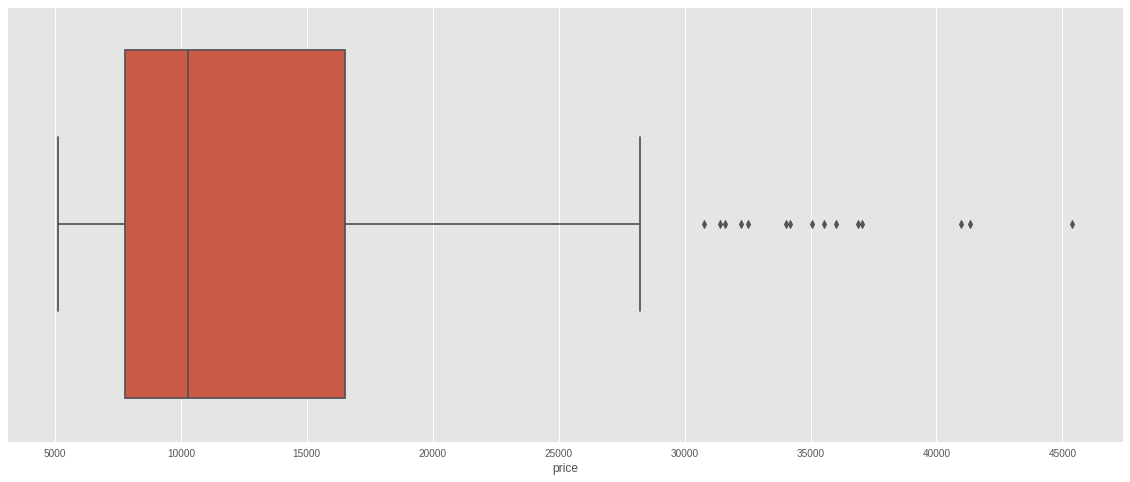

In [ ]:
plt.figure(figsize=[20,8])
sns.boxplot(x='price',data=df)
plt.show()

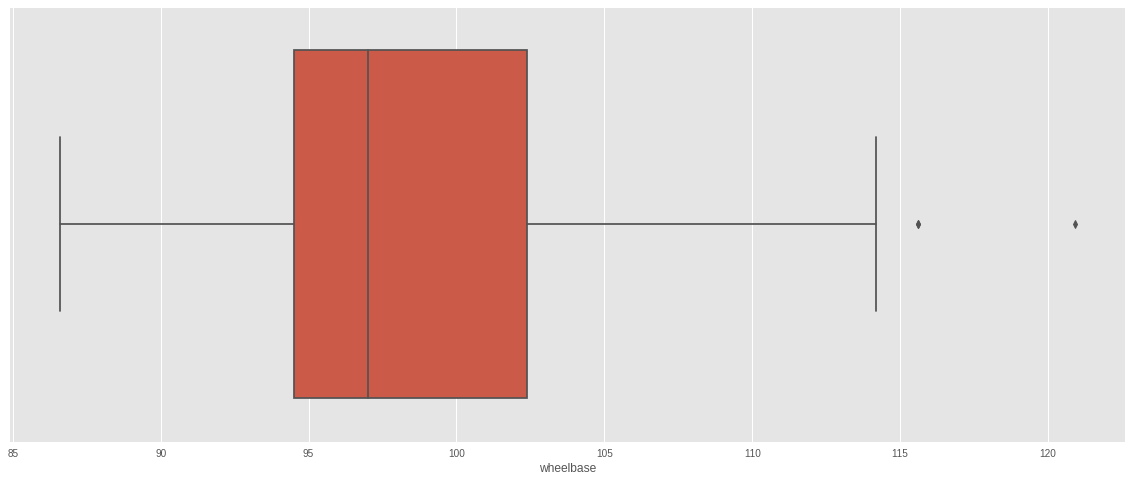

In [ ]:
plt.figure(figsize=[20,8])
sns.boxplot(x='wheelbase',data=df)
plt.show()

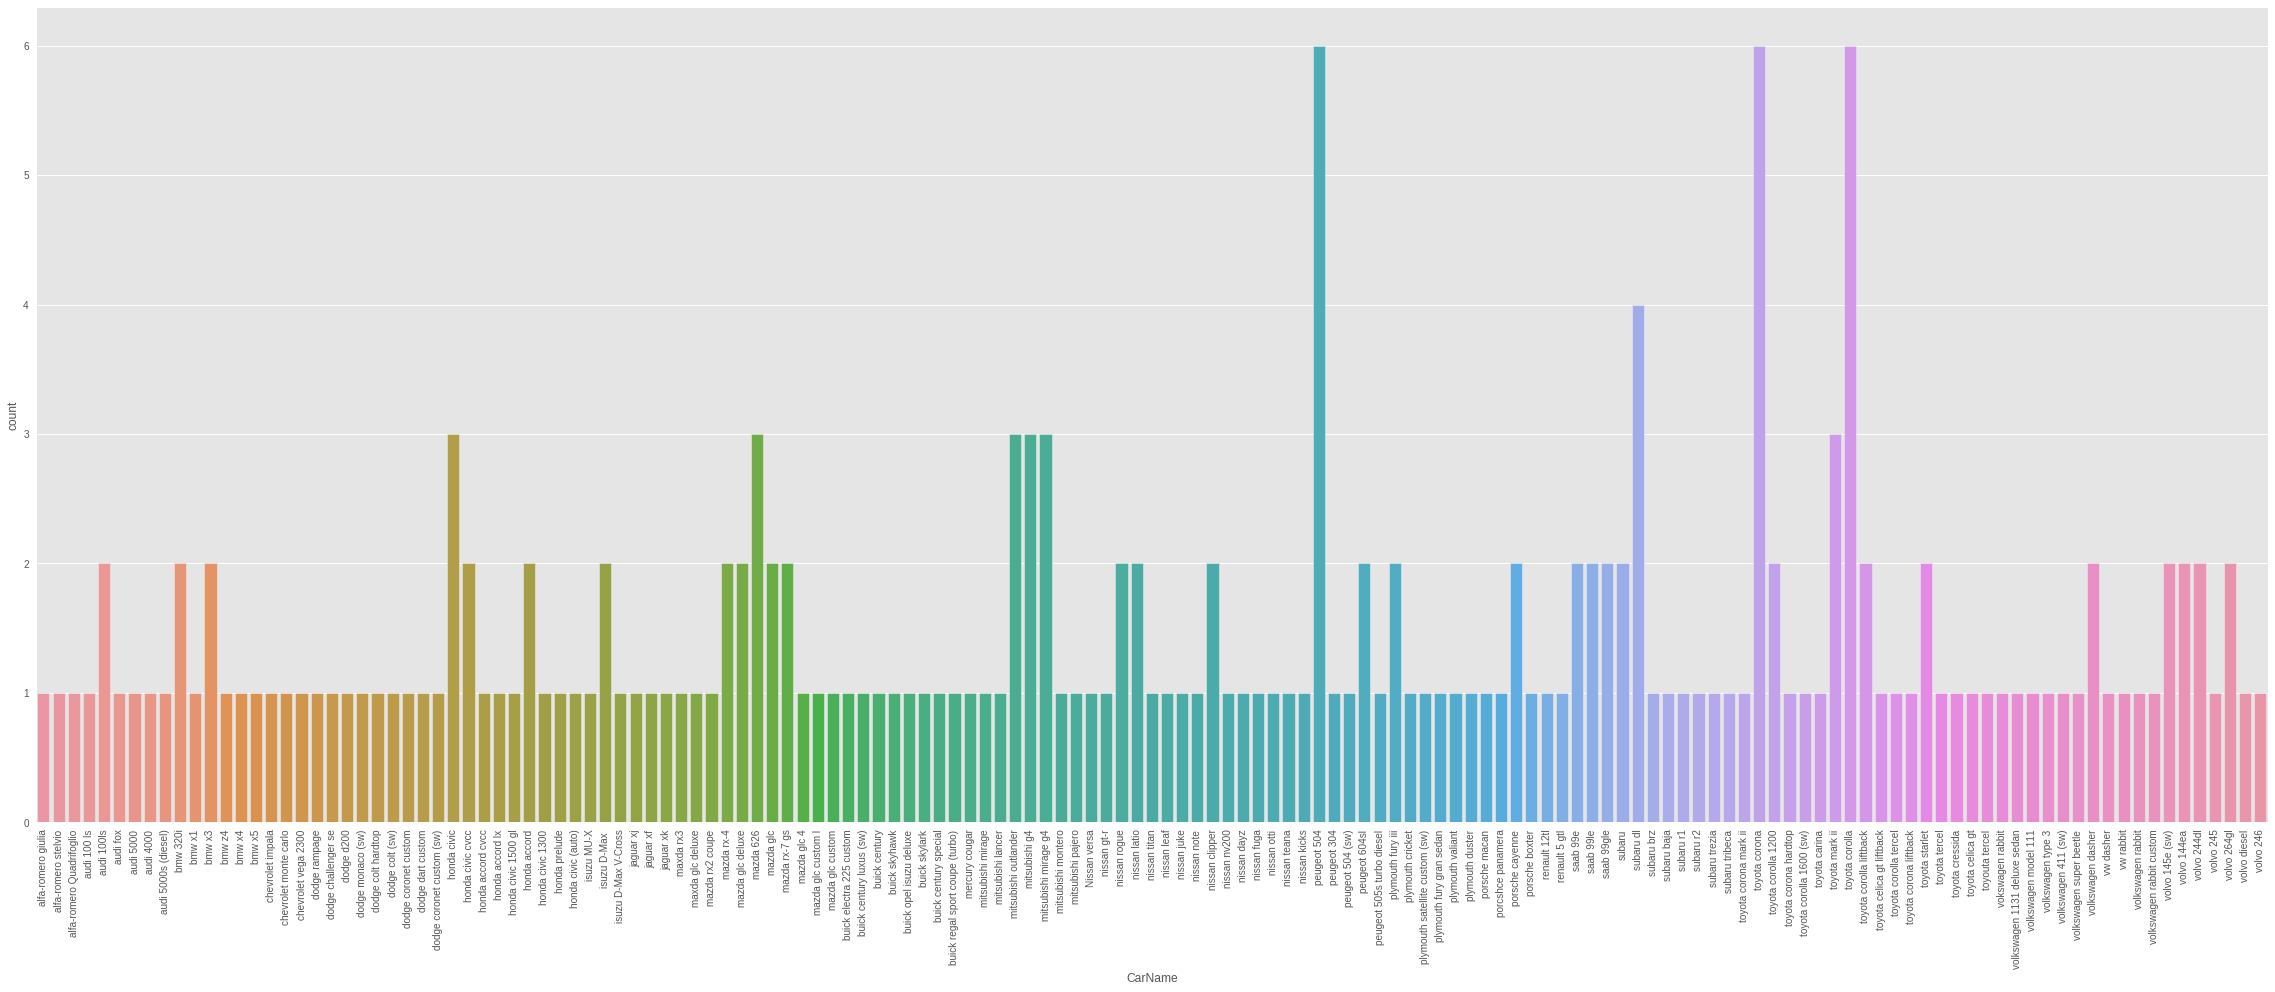

In [ ]:
plt.figure(figsize=[40,15])
palette = sns.color_palette("bright")
sns.countplot(x='CarName',data=df)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'fuel type')

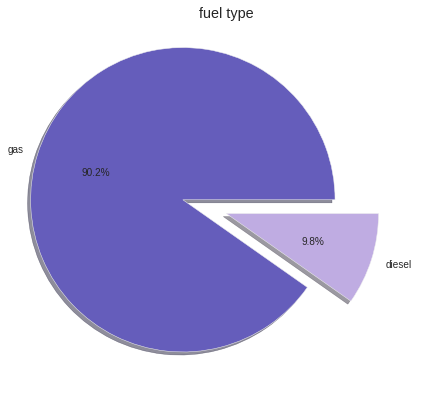

In [ ]:
myexplode = [0.3, 0]
plt.figure(figsize=[7,7])
plt.pie(df['fueltype'].value_counts(),labels=['gas', 'diesel'],autopct='%1.1f%%',shadow=True,explode=myexplode,colors=['#655DBB','#BFACE2'])
plt.title('fuel type')

In [ ]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

<AxesSubplot:xlabel='fueltype', ylabel='count'>

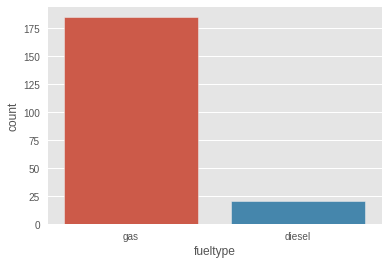

In [ ]:
sns.countplot(x=df['fueltype'])

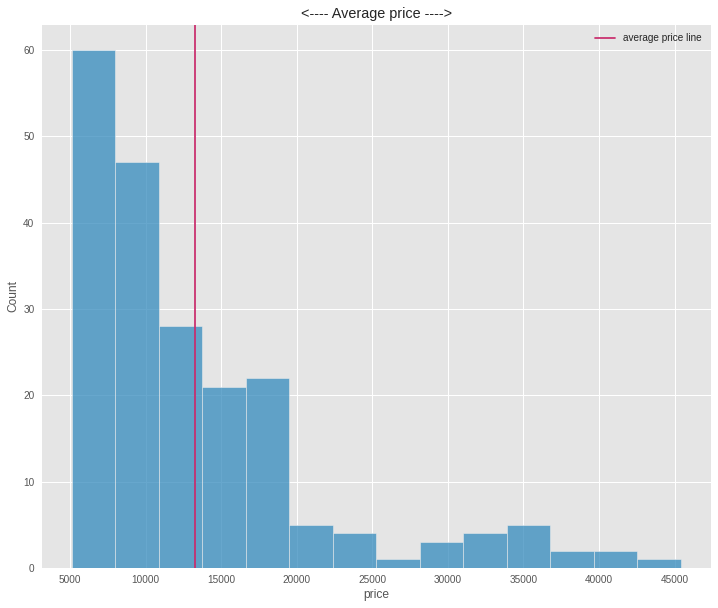

In [ ]:
plt.figure(figsize=[12,10])
sns.histplot(x='price',data=df)
plt.axvline(df['price'].mean(),label='average price line',color='#C92C6D')
plt.title('<---- Average price ---->')
plt.legend()
plt.show()

In [ ]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

<AxesSubplot:xlabel='aspiration', ylabel='price'>

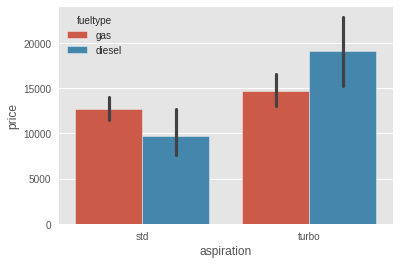

In [ ]:
sns.barplot(x='aspiration',y='price',hue='fueltype',data=df)

<AxesSubplot:xlabel='price', ylabel='Count'>

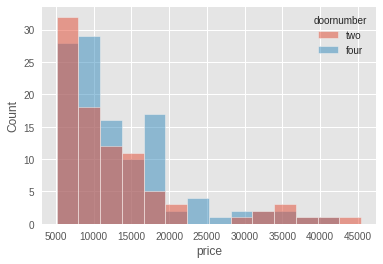

In [ ]:
sns.histplot(hue='doornumber',x='price',data=df)

<AxesSubplot:xlabel='carbody', ylabel='count'>

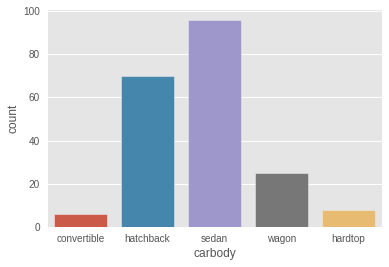

In [ ]:
sns.countplot(x='carbody',data=df)

<AxesSubplot:xlabel='carbody', ylabel='price'>

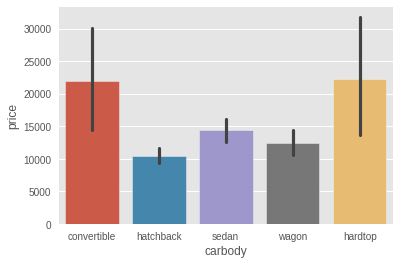

In [ ]:
sns.barplot(y='price',x='carbody',data=df)

In [ ]:
z=df['drivewheel'].value_counts()

([<matplotlib.patches.Wedge at 0x7f8f6c002550>,
 [Text(-0.29147957975199507, 1.060678864966961, 'fwd'),
  Text(0.1428822671576364, -1.0906808230329779, 'rwd'),
  Text(1.1886043149086132, -0.1649841888807122, '4wd')],
 [Text(-0.15898886168290638, 0.5785521081637968, '58.5%'),
  Text(0.07793578208598348, -0.5949168125634424, '37.1%'),
  Text(0.6933525170300243, -0.0962407768470821, '4.4%')])

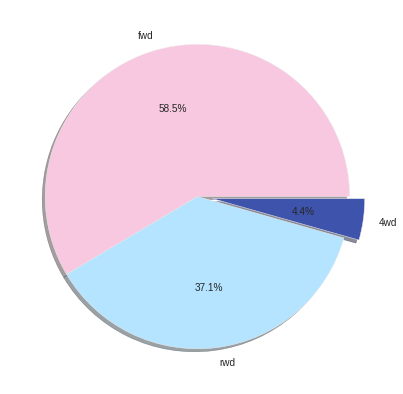

In [ ]:
myexplode = [0, 0,0.1]
plt.figure(figsize=[7,7])
plt.pie(z,labels=['fwd', 'rwd','4wd'],autopct='%1.1f%%',shadow=True,explode=myexplode,colors=['#F7C8E0','#B4E4FF','#3E54AC'])

<AxesSubplot:xlabel='drivewheel', ylabel='count'>

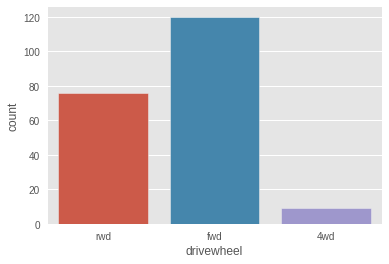

In [ ]:
sns.countplot(x='drivewheel',data=df)

In [ ]:
df2=df.select_dtypes(include='object')

In [ ]:
df2

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
5,audi fox,gas,std,two,sedan,fwd,front,ohc,five,mpfi
6,audi 100ls,gas,std,four,sedan,fwd,front,ohc,five,mpfi
7,audi 5000,gas,std,four,wagon,fwd,front,ohc,five,mpfi
8,audi 4000,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
9,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,ohc,five,mpfi


In [ ]:
df2.iloc[:,-4:]

,enginelocation,enginetype,cylindernumber,fuelsystem
0,front,dohc,four,mpfi
1,front,dohc,four,mpfi
2,front,ohcv,six,mpfi
3,front,ohc,four,mpfi
4,front,ohc,five,mpfi
5,front,ohc,five,mpfi
6,front,ohc,five,mpfi
7,front,ohc,five,mpfi
8,front,ohc,five,mpfi
9,front,ohc,five,mpfi


Text(0.5, 1.0, 'fuel type')

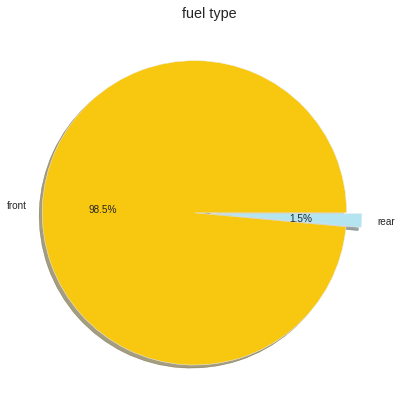

In [ ]:
myexplode = [0.1, 0]
plt.figure(figsize=[7,7])
plt.pie(df['enginelocation'].value_counts(),labels=['front', 'rear'],autopct='%1.1f%%',shadow=True,explode=myexplode,colors=['#F7C80f','#B4E4F0'])
plt.title('fuel type')

<AxesSubplot:xlabel='enginelocation', ylabel='count'>

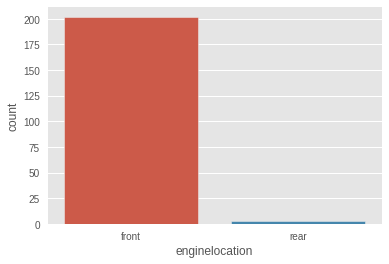

In [ ]:
sns.countplot(x='enginelocation',data=df2)

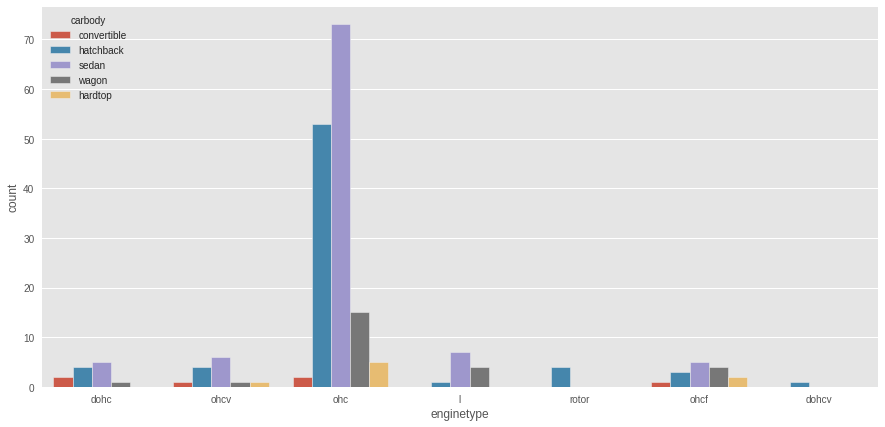

In [ ]:
plt.figure(figsize=[15,7])
sns.countplot(x='enginetype',hue='carbody',data=df)
plt.show()

<AxesSubplot:xlabel='fuelsystem', ylabel='count'>

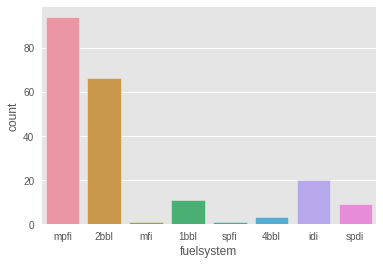

In [ ]:
sns.countplot(x='fuelsystem',data=df)

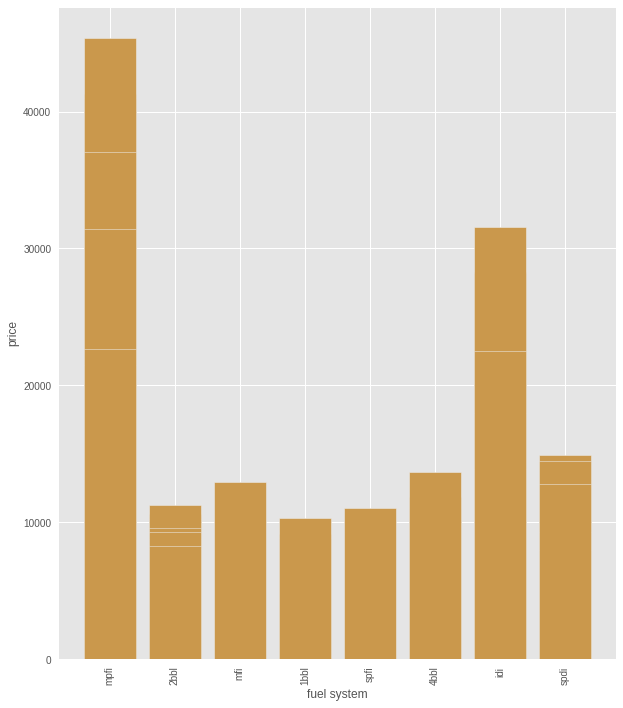

In [ ]:
plt.figure(figsize=[10,12])
plt.bar(df['fuelsystem'],df['price'],color="#ca984c")
plt.xlabel('fuel system')
plt.ylabel('price')
plt.xticks(rotation=90)
plt.show()

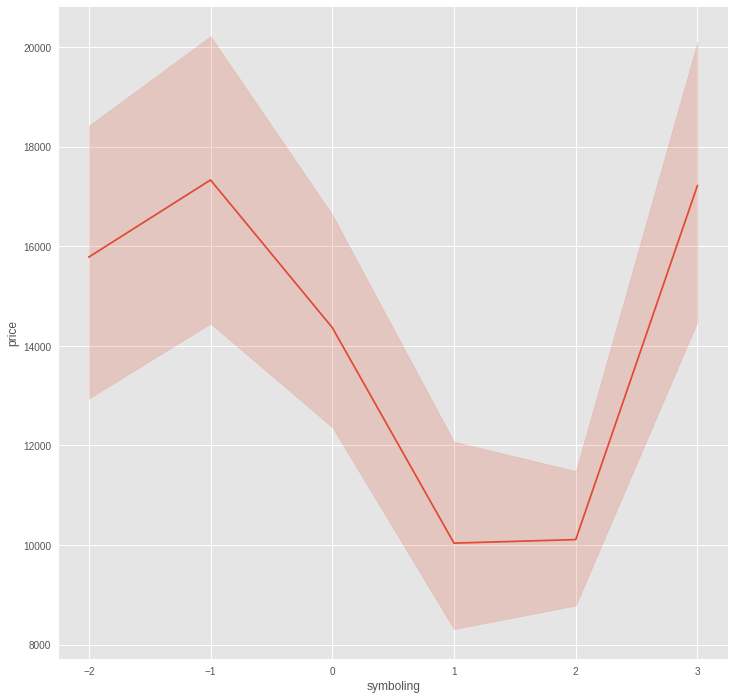

In [ ]:
plt.figure(figsize=[12,12])
sns.lineplot(x='symboling',y='price',data=df)
plt.show()

Text(0.5, 1.0, 'price vs wheelbase')

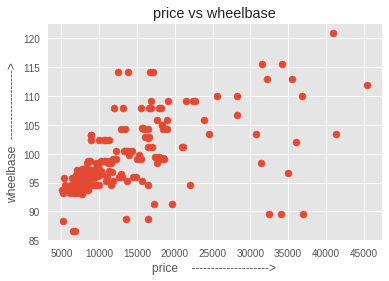

In [ ]:
plt.scatter(df['price'],df['wheelbase'])
plt.xlabel('price    -------------------->')
plt.ylabel('wheelbase  ------------------>')
plt.title('price vs wheelbase')

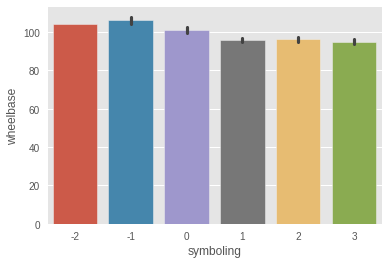

In [ ]:
import seaborn as sns
sns.barplot(y=df["wheelbase"],x=df['symboling'])
plt.show()

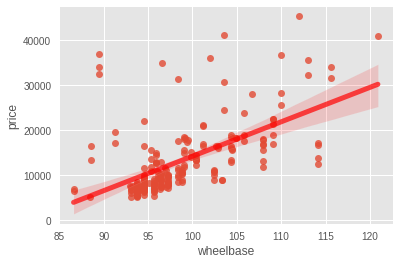

In [ ]:
sns.regplot(x=df["wheelbase"], y=df['price'], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

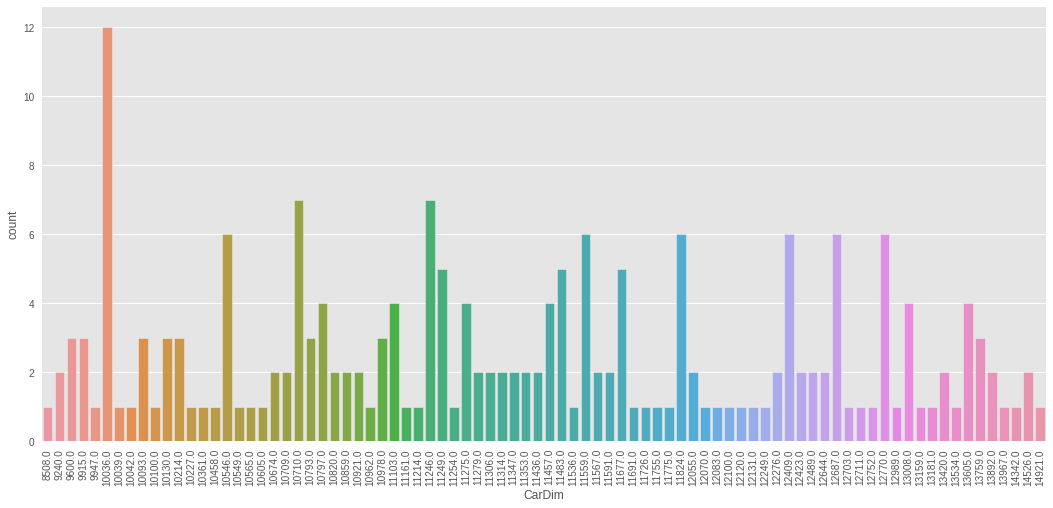

In [ ]:
df['Dim']=df['carlength']*df['carwidth']
df['CarDim']=df['Dim'].round()
plt.figure(figsize=[18,8])
sns.countplot(x='CarDim',data=df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='price', ylabel='CarDim'>

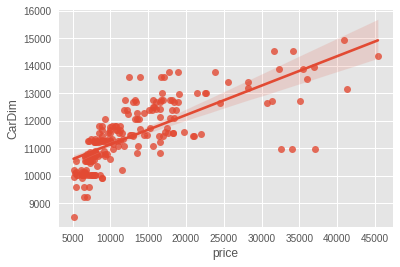

In [ ]:
sns.regplot(x='price',y='CarDim',data=df,)

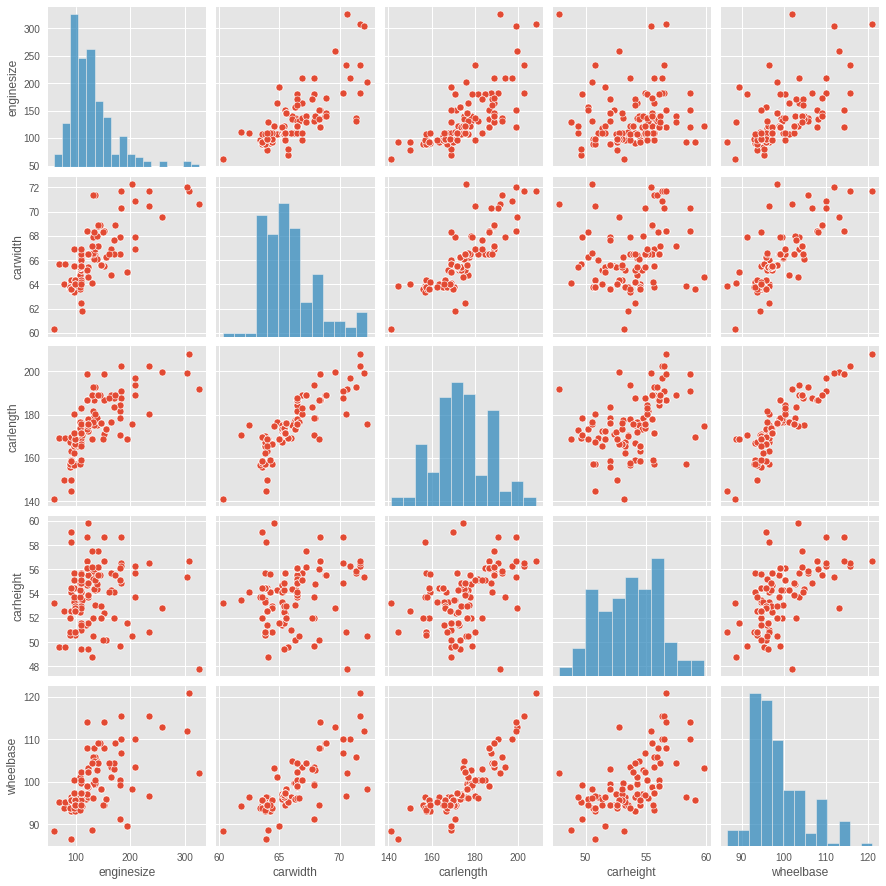

In [ ]:
sns.pairplot(df,
             x_vars=['enginesize','carwidth','carlength','carheight','wheelbase'],
             y_vars=['enginesize','carwidth','carlength','carheight','wheelbase']
             
             )

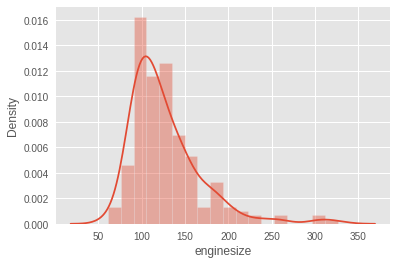

In [ ]:
sns.distplot( a=df["enginesize"], hist=True, kde=True, rug=False )
plt.show()

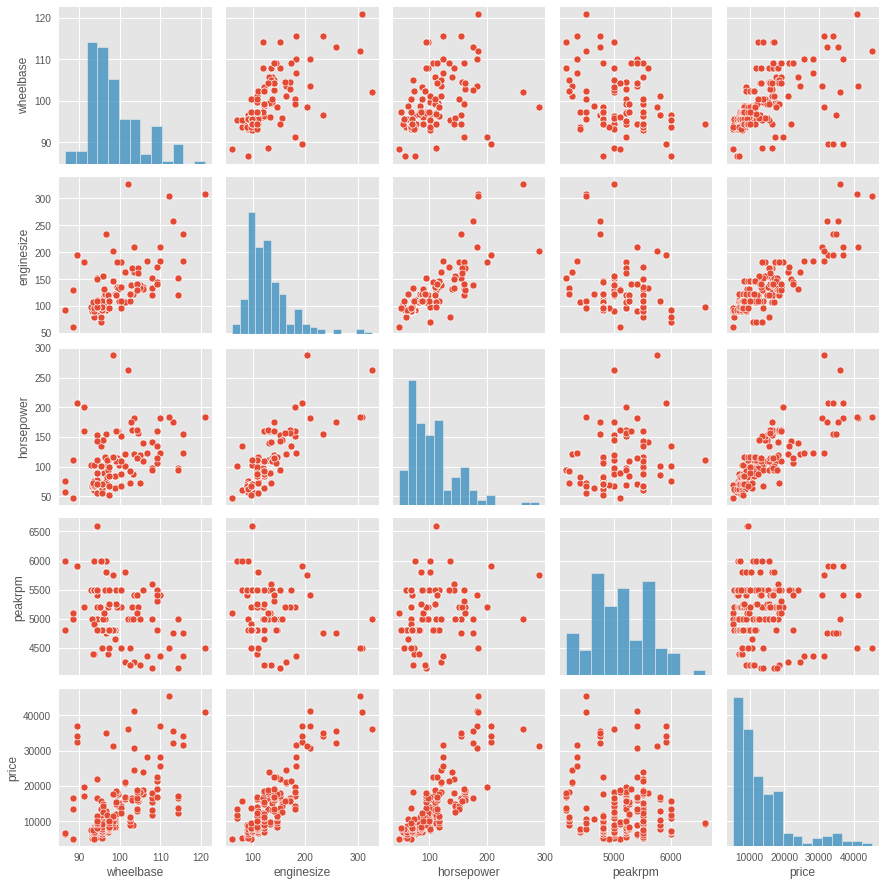

In [ ]:
sns.pairplot(
    df,
    x_vars=['wheelbase',"enginesize", "horsepower", "peakrpm","price"],
    y_vars=['wheelbase',"enginesize", "horsepower","peakrpm","price"],
)
plt.grid()
plt.show()

In [ ]:
df3=df.select_dtypes(include='float64')

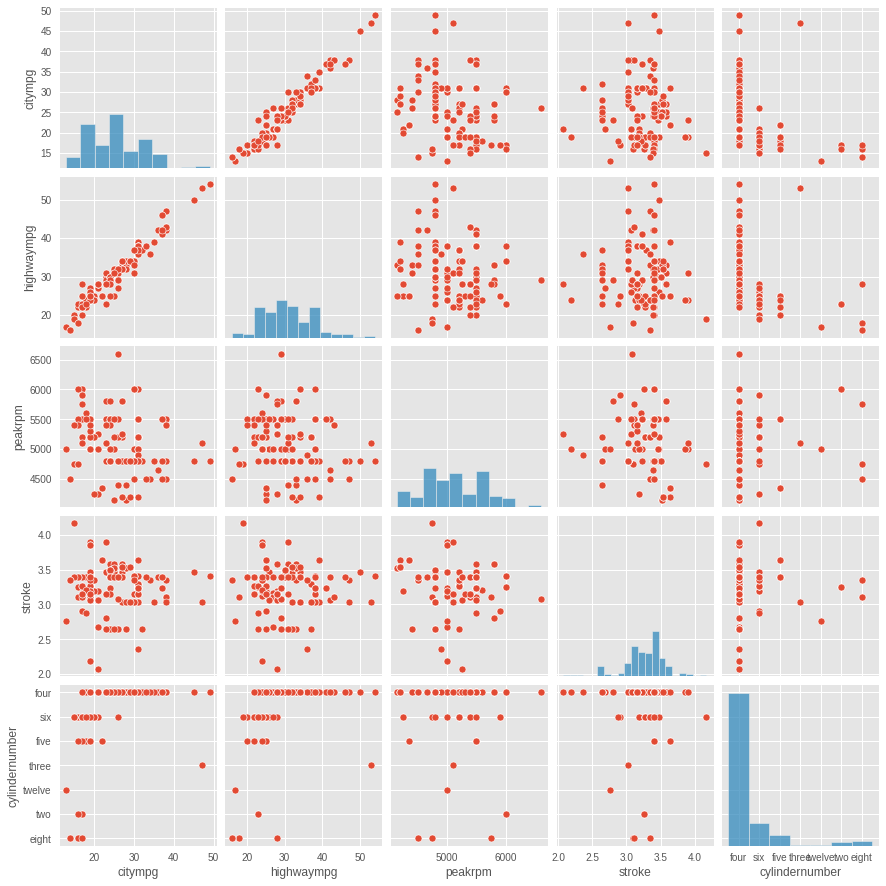

In [ ]:
sns.pairplot(
    df,
    x_vars=["citympg","highwaympg","peakrpm","stroke","cylindernumber"],
    y_vars=["citympg","highwaympg","peakrpm","stroke","cylindernumber"],
)

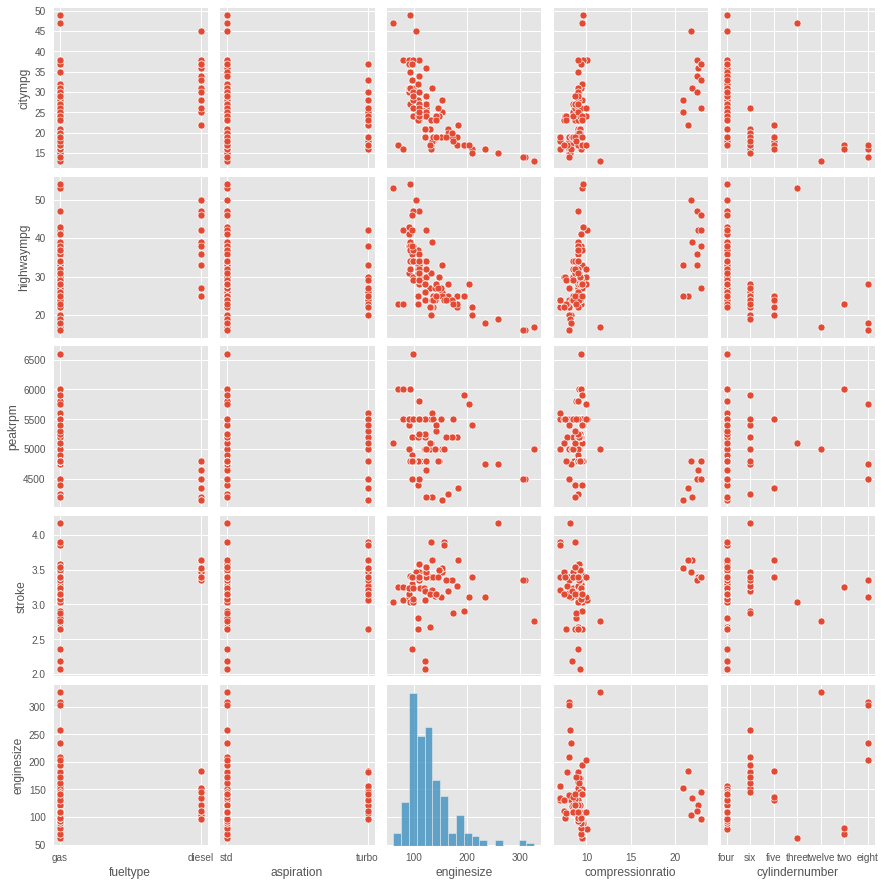

In [ ]:
sns.pairplot(
    df,
    x_vars=["fueltype","aspiration","enginesize","compressionratio","cylindernumber"],
    y_vars=["citympg","highwaympg","peakrpm","stroke","enginesize"],
)